<a id='back_to_top'></a>

<img src='img/_logo.JPG' alt='Drawing' style='width:2000px;'/>

# <font color=blue>3. Libraries</font>
## <font color=blue>3.8. Solutions</font>
### <font color=blue>Exercise 1: Workbook manipulation</font>

In [ ]:
import os
import openpyxl
import win32com.client as win32
import numpy as np
import matplotlib.pyplot as plt
import math

# Process data
path = 'C:\\Users\\Antonio\\Desktop\\PYTHON\\tools\\'
seism_zone_locs = {'1.1': 'Aljezur',
                   '1.2': 'Albufeira',
                   '1.3': 'Alcoutim',
                   '1.4': 'Alenquer',
                   '1.5': 'Abrantes',
                   '1.6': 'Almeida'}
results = {}
for new_seism_zone in seism_zone_locs.keys():
    new_location = seism_zone_locs[new_seism_zone]
    excel = win32.gencache.EnsureDispatch('Excel.Application')
    wb = excel.Workbooks.Open(path + 'EC8 Response Spectra.xlsx')
    ws = wb.Worksheets('EC8 Response Spectra')
    ws.Cells(6, 5).Value = new_location
    wb.SaveAs(path + 'temp_' + str(new_location) + '.xlsx')
    excel.Application.Quit()
    nwb = openpyxl.load_workbook(path + 'temp_' + str(new_location) + '.xlsx', data_only = True)
    nws = nwb.get_sheet_by_name('EC8 Response Spectra')
    if new_seism_zone[0] == '1':
        t = [nws.cell(row = i, column = 2).value for i in range(29, 61)]
        se = [nws.cell(row = i, column = 3).value for i in range(29, 61)] 
        results[new_seism_zone]= {}
        results[new_seism_zone]['T'] = t
        results[new_seism_zone]['Se'] = se   
    try:
        os.remove(path + 'temp_' + str(new_location) + '.xlsx')
    except OSError:
        pass

# Plot
plt.figure(figsize = (10, 5))
for seism_zone in sorted(results):
    x = results[seism_zone]['T']
    y = results[seism_zone]['Se']
    plt.plot(x, y, label = 'Seismic Zone: ' + str(seism_zone))
    plt.xlim(0, 4)
    plt.yticks(np.arange(0, 4 + 1.0, 1.0))
    plt.ylim(0, 8)
    plt.yticks(np.arange(0, 8 + 1.0, 1.0))
    plt.xlabel(r'$\mathregular{T_{1}\ [s]}$', fontsize = 12)
    plt.ylabel(r'$\mathregular{S_{e, Type\ 1}\ [ms^{-2}]}$', fontsize = 12)
    plt.grid(ls = '--')
    plt.legend(loc = 1, frameon=False)
plt.show()

### <font color=blue>Exercise 2: Database filtering and data processing</font>
#### <font color=blue>2A</font>

In [ ]:
import pandas as pd
sections = pd.read_csv('tools\\sections.txt', index_col = False)
n_profiles = len(sections[(sections['A_cm2'] > 300) & 
                          (sections['Section'].str.contains('H')) & 
                          (sections['Section'].str.contains('E')) & 
                          (sections['Section'].str.contains('B'))])
n_profiles

#### <font color=blue>2B</font>

In [1]:
import pandas as pd
sections = pd.read_csv('tools\\sections.txt', index_col = False)
profiles = list(sections[(sections['G_kg_m'] > 100) & 
                         (sections['Section'].str.contains('I')) & 
                         (sections['Section'].str.contains('P')) & 
                         (sections['Section'].str.contains('E'))]['Section'])
profiles

['IPE550', 'IPE600']

#### <font color=blue>2C</font>

In [ ]:
import pandas as pd
sections = pd.read_csv('tools\\sections.txt', index_col = False)
filt_temp = sections[(sections['A_cm2'] > 300)]
profiles = filt_temp[filt_temp['G_kg_m'] == filt_temp['G_kg_m'].min()]['Section'].item()
profiles

#### <font color=blue>2D</font>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

sections = pd.read_csv('tools\\sections.txt', index_col = False)

markers = {
           'HEA': 'o',
           'HEB': 'x',
           'HEM': '^',   
           'IPE': '*',
           }

colors = {
          'HEA': 'r',
          'HEB': 'b',
          'HEM': 'g',   
          'IPE': 'k',
          }

label_list = []

plt.figure(figsize = (10, 4), dpi = 100)
for section in sections['Section']:
    if 'HE' in section and 'A' in section: section_tag = 'HEA'
    elif 'HE' in section and 'B' in section: section_tag = 'HEB'
    elif 'HE' in section and 'M' in section: section_tag = 'HEM'
    elif 'IPE' in section: section_tag = 'IPE'
    A = float(sections[sections['Section'] == section]['A_cm2'])
    Iy = float(sections[sections['Section'] == section]['Iy_cm4'])
    if section_tag in label_list: 
        label = '_nolegend_'
    else:
        label = section_tag
        label_list.append(section_tag)
    plt.scatter(A, 
                Iy, 
                marker = markers[section_tag], 
                color = colors[section_tag],
                label = label)
    
plt.xlim(0, 500)
plt.xticks(np.arange(0, 500 + 50, 50))
plt.ylim(0, 800000)
plt.yticks(np.arange(0, 800000 + 100000, 100000))
plt.legend(frameon = False, loc = 'lower right')
plt.xlabel(r'$\mathregular{A\ [mm^2]}$', fontsize = 12)
plt.ylabel(r'$\mathregular{I_y\ mm^4]}$', fontsize = 12)
plt.grid(color = '0.75', ls = '--', lw = 0.5)
plt.show()

#### <font color=blue>2E</font>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

sections = pd.read_csv('tools\\sections.txt', index_col = False)

f, ((ax1, ax2)) = plt.subplots(1, 2, figsize = (8, 4))

label_list = []

markers = {
           'HEB': 'x',
           'HEM': '^',   
           }

colors = {
          'HEB': 'b',
          'HEM': 'g',   
          }

label_list = []
for section in sections['Section']:
    if 'HE' in section and 'A' in section: 
        section_tag = 'HEA'
        b_nom = int(section[2:-1])
        A_a = float(sections[sections['Section'] == section]['A_cm2'])
        Iy_a = float(sections[sections['Section'] == section]['Iy_cm4'])
        section_tag_mod_b = section_tag[:-1]+ 'B'
        section_mod_b = section[:-1] + 'B'
        A_b = float(sections[sections['Section'] == section_mod_b]['A_cm2'])
        Iy_b = float(sections[sections['Section'] == section_mod_b]['Iy_cm4'])
        section_tag_mod_m = section_tag[:-1]+ 'M'
        section_mod_m = section[:-1] + 'M'
        A_m = float(sections[sections['Section'] == section_mod_m]['A_cm2'])
        Iy_m = float(sections[sections['Section'] == section_mod_m]['Iy_cm4'])
        
        if section_tag_mod_b in label_list: 
            label_b = '_nolegend_'
        else:
            label_b = section_tag_mod_b
            label_list.append(section_tag_mod_b)

        if section_tag_mod_m in label_list: 
            label_m = '_nolegend_'
        else:
            label_m = section_tag_mod_m
            label_list.append(section_tag_mod_m)            
            
        ax1.scatter(b_nom, A_b/A_a, marker = markers[section_tag_mod_b], color = colors[section_tag_mod_b], label = label_b)
        ax1.scatter(b_nom, A_m/A_a, marker = markers[section_tag_mod_m], color = colors[section_tag_mod_m], label = label_m)
        ax2.scatter(b_nom, Iy_b/Iy_a, marker = markers[section_tag_mod_b], color = colors[section_tag_mod_b], label = label_b)
        ax2.scatter(b_nom, Iy_m/Iy_a, marker = markers[section_tag_mod_m], color = colors[section_tag_mod_m], label = label_m)

for ax in f.axes:
    ax.set_xlim(0, 1200) 
    ax.set_ylim(1.0, 4.0)
    ax.grid(color = '0.75', ls = '--', lw = 0.5)
    ax.legend(frameon = False, loc = 'upper right')
    ax.set_xlabel(r'$\mathregular{b_{NOM}\ [mm]}$', fontsize = 12)
    if ax == ax1: ax.set_ylabel(r'$\mathregular{A_{HE}\ /\ A_{HEA}}$', fontsize = 12)   
    elif ax == ax2: ax.set_ylabel(r'$\mathregular{I_{y,HE}\ /\ I_{y,HEA}}$', fontsize = 12)      
plt.tight_layout()
plt.show()

### <font color=blue>Exercise 3: Database filtering and data processing</font> 
#### <font color=blue>3A</font>

In [ ]:
import pandas as pd
df = pd.read_excel('tools\\imdb1001.xlsx')

n_above = len(df[df['Year'] >= 1991])
n_total = len(df)
percentage = n_above/n_total

"{0:.1f}%".format(percentage * 100)

#### <font color=blue>3B</font>

In [ ]:
import pandas as pd
df = pd.read_excel('tools\\imdb1001.xlsx')

longest_row = df[df['Runtime (mins)'] == max(df['Runtime (mins)'])]
longest_title = longest_row['Title'].item()
longest_duration = longest_row['Runtime (mins)'].item()

'Longest (%smin): %s' % (longest_duration, longest_title)

#### <font color=blue>3C</font>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_excel('tools\\imdb1001.xlsx')

linestyles = {
              'min': '--',
              'max': ':',
              'mean': '-',
              }

colors = {
          'min': 'b',
          'max': 'r',
          'mean': 'k',
          }

year_max = max(df['Year'])
year_min = min(df['Year'])

year_ratings = {}

for year in np.arange(year_min, year_max + 1, 1):
    rating_list = []
    for index, row in df[df['Year'] == year].iterrows():
        row_year = row['Year']
        row_rating = row['Rating']
        rating_list.append(row_rating)
    if rating_list != []:
        year_ratings[year] = {}  
        year_ratings[year]['min'] = min(rating_list)
        year_ratings[year]['max'] = max(rating_list)     
        year_ratings[year]['mean'] = np.mean(rating_list)  
    
year_list = [key for key in year_ratings]
min_list = [year_ratings[key]['min'] for key in year_ratings]        
max_list = [year_ratings[key]['max'] for key in year_ratings]    
mean_list = [year_ratings[key]['mean'] for key in year_ratings]        

plt.figure(figsize = (10, 4), dpi = 100)
plt.plot(year_list, min_list, ls = linestyles['min'], color = colors['min'], label = 'Minimum')
plt.plot(year_list, max_list, ls = linestyles['max'], color = colors['max'], label = 'Maximum')
plt.plot(year_list, mean_list, ls = linestyles['mean'], color = colors['mean'], label = 'Average')
plt.xlim(1900, 2040)
plt.ylim(6.5, 9.5)
plt.xlabel('Year', fontsize = 12) 
plt.ylabel('Rating', fontsize = 12) 
plt.grid(color = '0.75', ls = '--', lw = 0.5)
plt.legend(frameon = False, loc = 'upper right')
plt.show()

#### <font color=blue>3D</font>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_excel('tools\\imdb1001.xlsx')

year_max = max(df['Year'])
year_min = min(df['Year'])

runtimes = []
years = np.arange(year_min, year_max + 1, 1)
for year in years:
    sum_runtime = np.sum(df[df['Year'] == year]['Runtime (mins)'])
    runtimes.append(sum_runtime)

minutes = sum(runtimes)
weeks, minutes = divmod(minutes, 7*24*60)
days, minutes = divmod(minutes, 24*60)
hours, minutes = divmod(minutes, 60)
total_time = '%sw %sd %sh %sm' % (weeks, days, hours, minutes)

plt.figure(figsize = (10, 4), dpi = 100)
plt.plot(years, runtimes, color = 'r', label = r'$\mathrm{\sum Runtime}: $' + total_time)
plt.xlim(1900, 2040)
plt.ylim(0, 4000)
plt.xlabel('Year', fontsize = 12)
plt.ylabel(r'$\mathrm{\sum_{Year} Runtime\ [min] }$', fontsize = 12)
plt.grid(color = '0.75', ls = '--', lw = 0.5)
plt.legend(frameon = False, loc = 'upper left')
plt.show()

#### <font color=blue>3E</font>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

df = pd.read_excel('tools\\imdb1001.xlsx')

x = df['Year']
y = df['Runtime (mins)']
z = df['Rating']

fig = plt.figure(figsize = (5, 5), dpi = 100)
ax = Axes3D(fig)
ax.scatter(x, y, z, color = 'b', alpha = 0.5)
ax.scatter(x, z, color = 'r', marker = 'o', alpha = 0.05, zdir = 'y', zs = 400)
ax.scatter(y, z, color = 'r', marker = 'o', alpha = 0.05, zdir = 'x', zs = 1900)
ax.scatter(x, y, color = 'r', marker = 'o', alpha = 0.05, zdir = 'z', zs = 6.5)
ax.set_xlim([1900, 2040])
ax.set_ylim([0, 400])
ax.set_zlim([6.5, 9.5])
ax.set_xlabel('Year', fontsize = 12)
ax.set_ylabel('Runtime [mins]', fontsize = 12)
ax.set_zlabel('Rating', fontsize = 12)
plt.show()

### <font color=blue>Exercise 4: Database filtering and data processing</font>  
#### <font color=blue>4A</font>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('tools\\SHAREver33raw_d8.csv')
x = df['year']
y = df['magnitude']
npoints = len(x)

plt.figure(figsize = (10, 4), dpi = 100)
plt.scatter(x, y, marker = 'o', color = 'red', alpha = 0.5, label = r'$\mathrm { O: \sum N= }$' + str(npoints), zorder = 10000)
plt.xlim(1000, 2100)
plt.xticks(np.arange(1000, 2100 + 100, 100))
plt.ylim(0, 10)
plt.yticks(np.arange(0, 10 + 2, 2))
plt.legend(frameon = False,
           loc = 'lower right')
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Magnitude', fontsize = 12)
plt.grid(color = '0.75', ls = '--', lw = 0.5)
plt.show()

#### <font color=blue>4B</font>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('tools\\SHAREver33raw_d8.csv')

n_total = len(df)

year_min = df['year'].min()
year_max = df['year'].max()

year_middles = []
probs = []
for year_bin_middle in np.arange(1025, 2025 + 50, 50):   
    n_events_bin = len(df[(df['year'] >= year_bin_middle - 25) & (df['year'] < year_bin_middle + 25)])
    prob_bin = n_events_bin/n_total
    year_middles.append(year_bin_middle)
    probs.append(prob_bin)
    
plt.figure(figsize = (10, 4), dpi = 100)
plt.plot(year_middles, probs, marker = 'x', color = 'red', label = 'PDF')
plt.plot(year_middles, np.cumsum(probs), marker = '.', color = 'b', ls = '--', label = 'CDF')
plt.xlim(1000, 2050)
ticks = np.arange(1000, 2050 + 25, 25)
labels = []
for i in ticks:
    if i in np.arange(1025, 2025 + 50, 50): labels.append(i)
    else: labels.append('')
plt.xticks(ticks, labels, rotation = 90)
plt.ylim(0, 1)
plt.yticks(np.arange(0, 1 + 0.1, 0.1))
plt.legend(frameon = False, loc = 'upper left')
plt.xlabel('Year bin', fontsize = 12)
plt.ylabel('Percentage of events in year bin', fontsize = 12)
plt.grid(color = '0.75', ls = '--', lw = 0.5)
plt.show()    

#### <font color=blue>4C</font>

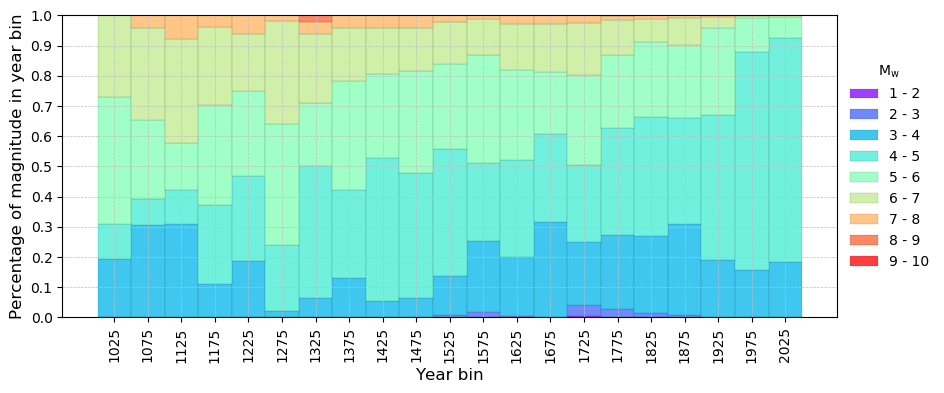

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

df = pd.read_csv('tools\\SHAREver33raw_d8.csv')

n_total = len(df)

results = {}
mags = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
mags_mod = [i for i in zip(mags[::1], mags[1::1])]
for year_bin_middle in np.arange(1025, 2025 + 50, 50):
    results[year_bin_middle] = {}
    n_year = 0
    filt_df = df[(df['year'] >= year_bin_middle - 25) & (df['year'] < year_bin_middle + 25)]
    n_events_year_bin = len(filt_df)
    for magnitude_bin in mags_mod:
        mag_bin_tag = '%s - %s'% (magnitude_bin[0], magnitude_bin[1])
        n_events_mag_bin = len(filt_df[(filt_df['magnitude'] >= magnitude_bin[0]) & (filt_df['magnitude'] < magnitude_bin[1])])
        results[year_bin_middle][mag_bin_tag] = n_events_mag_bin/n_events_year_bin
    
one_two = np.array([(results[year]['1 - 2']) for year in results])
two_three = np.array([(results[year]['2 - 3']) for year in results])
three_four = np.array([(results[year]['3 - 4']) for year in results])
four_five = np.array([(results[year]['4 - 5']) for year in results])
five_six = np.array([(results[year]['5 - 6']) for year in results])
six_seven = np.array([(results[year]['6 - 7']) for year in results])
seven_eight = np.array([(results[year]['7 - 8']) for year in results])
eight_nine = np.array([(results[year]['8 - 9']) for year in results])
nine_ten = np.array([(results[year]['9 - 10']) for year in results])

colors = cm.rainbow(np.linspace(0, 1, 9))

plt.figure(figsize = (10, 4), dpi = 100)
ind = np.arange(len(results))
width = 1.0
lw = 0.1
alpha = 0.75
edgecolor = 'k'
p1 = plt.bar(ind, one_two, width, edgecolor = edgecolor, alpha = alpha, color = colors[0], lw = lw)
p2 = plt.bar(ind, two_three, width, edgecolor = edgecolor, alpha = alpha, color = colors[1], lw = lw, bottom = one_two)
p3 = plt.bar(ind, three_four, width, edgecolor = edgecolor, alpha = alpha, color = colors[2], lw = lw, bottom = one_two + two_three)
p4 = plt.bar(ind, four_five, width, edgecolor = edgecolor, alpha = alpha, color = colors[3], lw = lw, bottom = one_two + two_three + three_four)
p5 = plt.bar(ind, five_six, width, edgecolor = edgecolor, alpha = alpha, color = colors[4], lw = lw, bottom = one_two + two_three + three_four + four_five)
p6 = plt.bar(ind, six_seven, width, edgecolor = edgecolor, alpha = alpha, color = colors[5], lw = lw, bottom = one_two + two_three + three_four + four_five + five_six)
p7 = plt.bar(ind, seven_eight, width, edgecolor = edgecolor, alpha = alpha, color = colors[6], lw = lw, bottom = one_two + two_three + three_four + four_five + five_six + six_seven)
p8 = plt.bar(ind, eight_nine, width, edgecolor = edgecolor, alpha = alpha, color = colors[7], lw = lw, bottom = one_two + two_three + three_four + four_five + five_six + six_seven + seven_eight)
p9 = plt.bar(ind, nine_ten, width, edgecolor = edgecolor, alpha = alpha, color = colors[8], lw = lw, bottom = one_two + two_three + three_four + four_five + five_six + six_seven + seven_eight + eight_nine)
plt.xlabel('Year bin', fontsize = 12)
plt.ylabel('Percentage of magnitude in year bin', fontsize = 12)
plt.xticks(ind, np.arange(1025, 2025 + 50, 50), rotation = 90)
plt.ylim(0, 1)
plt.yticks(np.arange(0, 1 + 0.1, 0.1))
plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0], p6[0], p7[0], p8[0], p9[0]), 
           ('1 - 2', '2 - 3', '3 - 4', '4 - 5', '5 - 6', '6 - 7', '7 - 8', '8 - 9', '9 - 10'), 
           frameon = False,
           loc = 'center left', 
           bbox_to_anchor = (1, 0.5),
           title = r'$\mathrm{M_w}$')
plt.grid(color = '0.75', ls = '--', lw = 0.5)
plt.show()

### <font color=blue>Exercise 5: Database filtering and data processing</font>   

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Process scaling factors
sf_dict = {'1-LomaPrieta': 0.97839,
           '2-WhittierNarrows-02': 3.99999,
           '3-ImperialValley-06': 2.85368,
           '4-DuzceTurkey': 0.3589,
           '5-Chi-ChiTaiwan': 3.56629,
           '6-VictoriaMexico': 3.12427,
           '7-Northridge-01': 1.36256,
           '8-HectorMine': 2.79331,
           '9-Chi-ChiTaiwan-05': 2.68739,
           '10-Chi-ChiTaiwan-06': 2.15636
          }

# Process scaled and average records
df = pd.read_csv('tools\\response_spectra.txt')
scaled_rs_dict = {}
record_list = []
av_scaled_rs = np.zeros(len(df['T']))
for record in sf_dict:
    record_list.append(record)
    scaled_spectrum = df[record]*sf_dict[record]
    av_scaled_rs = av_scaled_rs + scaled_spectrum
    scaled_rs_dict[record] = scaled_spectrum
av_scaled_rs = av_scaled_rs/len(record_list)
scaled_rs_dict['average'] = av_scaled_rs
scaled_rs_dict['T'] = df['T']

# Plot
plt.figure(figsize=(10, 5))
for record in record_list:
    plt.plot(scaled_rs_dict['T'], scaled_rs_dict[record], label = '_nolegend_', color = '0.75', lw = 0.75)
plt.plot(scaled_rs_dict['T'], scaled_rs_dict['average'], label = 'Average response spectrum', color = 'red', lw = 1.0)
plt.xlim(0, 4)
plt.xticks(np.arange(0, 4 + 0.5, 0.5))
plt.ylim(0, 0.8)
plt.yticks(np.arange(0, 0.8 + 0.2, 0.2))
plt.xlabel(r'$\mathregular{T_{1}\ [s]}$', fontsize = 12)
plt.ylabel(r'$\mathregular{S_{d}\ [g]}$', fontsize = 12)
plt.grid(ls = '--')
plt.legend(loc = 1, frameon=False)
plt.show()

### <font color=blue>Exercise 6: Database filtering and data processing</font>   
#### <font color=blue>6A</font>

In [ ]:
import pandas as pd
df = pd.read_csv('tools\\pokemon.csv', index_col = False)
# Remove duplicate pokemons (based on repeated values of '#' column)
df_mod = df.drop_duplicates(subset = '#', keep = 'first')
# Count
n_poke = len(df_mod)
n_poke

#### <font color=blue>6B</font>

In [ ]:
import pandas as pd
df = pd.read_csv('tools\\pokemon.csv', index_col = False)
# Remove duplicate pokemons (based on repeated values of '#' column)
df_mod = df.drop_duplicates(subset = '#', keep = 'first')
# Filter
poke_row = df_mod[df_mod['Attack'] == df_mod['Attack'].max()]
poke_name = poke_row['Name'].item()
poke_type1 = poke_row['Type 1'].item()
print('The Pokémon with the highest attack is %s, which belongs to %s type.' % (poke_name, poke_type1))

#### <font color=blue>6C</font>

In [3]:
import pandas as pd
df = pd.read_csv('tools\\pokemon.csv', index_col = False)
# Remove duplicate pokemons (based on repeated values of '#' column)
df_mod = df.drop_duplicates(subset = '#', keep = 'first')
# Filter
temp = df_mod[df_mod['Generation'] == 1]
poke_row = temp[temp['Total'] == temp['Total'].max()]
poke_name = poke_row['Name'].item()
print('The Pokémon with the highest total from generation 1 is %s' % (poke_name))

The Pokémon with the highest total from generation 1 is Mewtwo


#### <font color=blue>6D</font>

In [ ]:
# Process data
import pandas as pd

# Read database
df = pd.read_csv('tools\\pokemon.csv', index_col = False)

# Remove duplicate pokemons (based on repeated values of '#' column)
df_mod = df.drop_duplicates(subset = '#', keep = 'first')

# Create list of unique 'Types'
types_all = df_mod['Type 1'].unique()

# Create dictionary with all the processed data
results = {}
for gen in range(1, 6 + 1, 1):
    results['Generation %s' % gen] = {}
    # Filter database based on individuals from each 'Generation'
    gen_filt = df_mod[df_mod['Generation'] == gen]
    # Get 'Types' and counts of each type with internal methods of pandas 
    types = gen_filt['Type 1'].value_counts().keys()
    counts = gen_filt['Type 1'].value_counts().values
    # Add information to results, in each 'Generation', with 'Type' (key) and count (value)
    for idx in range(len(types)):
        results['Generation %s' % gen][types[idx]] = counts[idx]
    # Add 'Type' keys (with null values) for types that are not in that generation
    for i in types_all:
        if i not in results['Generation %s' % gen]:
            results['Generation %s' % gen][i] = 0

In [ ]:
# Plot processed data
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm 

# Create indexes for all bars of all 'Types'
inds = {}
count = 1
for i in sorted(types_all):
    inds[i] = count
    count += 1
        
# Create array of colors for each gen
n = len(results)
cmap = cm.get_cmap('jet')
colors = cmap(np.linspace(0.1, 0.9, n))
color_dict = {}
idx = 0
for gen in sorted(results):
    color_dict[gen] = colors[idx]
    idx += 1
    
legends = []
grid = plt.GridSpec(4, 2)
fig = plt.figure(figsize = (2.5*3, 4*3), dpi = 100)
ax1 = plt.subplot(grid[0:1, :])
ax2 = plt.subplot(grid[1, 0])
ax3 = plt.subplot(grid[1, 1])
ax4 = plt.subplot(grid[2, 0])
ax5 = plt.subplot(grid[2, 1])
ax6 = plt.subplot(grid[3, 0])
ax7 = plt.subplot(grid[3, 1])

width = 0.8
for i in types_all:
    bottom = 0
    for gen in results:
        if gen not in legends:
            label = gen.replace('Generation', 'Gen.')
            legends.append(gen)
        else:
            label = '_nolegend_'
        ax1.bar(inds[i], results[gen][i], width = width, bottom = bottom, color = color_dict[gen], label = label, zorder = 1000)
        bottom += results[gen][i]

for gen in results:
    total_gen = sum([results[gen][i] for i in results[gen]])
    for i in types_all:
        if gen == 'Generation 1': ax2.bar(inds[i], results[gen][i]/total_gen, width = width, color = color_dict[gen], zorder = 1000)
        elif gen == 'Generation 2': ax3.bar(inds[i], results[gen][i]/total_gen, width = width, color = color_dict[gen], zorder = 1000)
        elif gen == 'Generation 3': ax4.bar(inds[i], results[gen][i]/total_gen, width = width, color = color_dict[gen], zorder = 1000)
        elif gen == 'Generation 4': ax5.bar(inds[i], results[gen][i]/total_gen, width = width, color = color_dict[gen], zorder = 1000)
        elif gen == 'Generation 5': ax6.bar(inds[i], results[gen][i]/total_gen, width = width, color = color_dict[gen], zorder = 1000)
        elif gen == 'Generation 6': ax7.bar(inds[i], results[gen][i]/total_gen, width = width, color = color_dict[gen], zorder = 1000)            
for ax in [ax1, ax2, ax3, ax4, ax5, ax6, ax7]:
    ax.set_xticks([inds[i] for i in inds])
    ax.set_xticklabels([i for i in inds], rotation = 90, fontsize = 8)
    ax.grid(color = '0.85', axis = 'y')
    ax.set_xlim([inds[i] for i in inds][0] - 1, [inds[i] for i in inds][-1] + 1)
    if ax != ax1:
        ax.set_ylim(0, 0.2)
        vals = ax.get_yticks()
        ax.set_yticklabels(['{:3.0f}%'.format(y*100) for y in vals], fontsize = 8)
        ax.set_ylabel('Distribution within generation')
    else:
        ax.set_ylabel('Number of individuals')
        ax.set_ylim(0, 125)
        ax.set_yticks(np.arange(0, 125 + 25, 25))
        ax.set_yticklabels(np.arange(0, 125 + 25, 25), fontsize = 8)

ax1.legend(frameon = False, fontsize = 8, ncol = 6, loc = 'upper center')
plt.tight_layout()
plt.show()

### <font color=blue>Exercise 7: Database filtering and data processing</font>   
#### <font color=blue>7A</font>

In [ ]:
import pandas as pd
df = pd.read_csv('tools\\ufo.csv', index_col = False)
n_sight = len(df)
n_sight

#### <font color=blue>7B</font>

In [ ]:
import pandas as pd
df = pd.read_csv('tools\\ufo.csv', index_col = False)
years = df['year'].value_counts().keys().tolist()
counts = df['year'].value_counts().tolist()
print('The year with the most sightings (%s) is %s.' % (counts[0], years[0]))

#### <font color=blue>7C</font>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

df = pd.read_csv('tools\\ufo.csv', index_col = False)
year_min = min(df['year'])
year_max = max(df['year'])
years = np.arange(year_min, year_max + 1, 1)
counts = df['year'].value_counts().tolist()
count_min = min(counts)
count_max = max(counts)

# Create array of colors depending on count
count_lims = np.linspace(count_min, count_max, 25)
n = len(count_lims)
cmap = cm.get_cmap('rainbow')
colors = cmap(np.linspace(0.5, 1.0, n))
color_dict = {}
idx = 0
for count_lim in count_lims:
    color_dict[count_lim] = colors[idx]
    idx += 1

# Plot the data
plt.figure(figsize = (10, 5))
for year in years:
    count = len(df[df['year'] == year])
    for count_lim in count_lims:
        if count >= count_lim:
            color = color_dict[count_lim]  
    plt.bar(year, count, zorder = 1000, width = 1, color = color)
plt.plot([1990, 1990], [0, 8000], ls = '--', color = '0.25')
plt.text(1988, 0.9*count_max, 'Adobe Photoshop', rotation = 90, color = '0.25')
plt.grid(axis = 'y')
plt.xticks(np.arange(1900, 2015 + 5, 5), rotation = 90, fontsize = 12)
plt.xlim(1900, 2015 + 1)
plt.xlabel('Year', fontsize = 12)
plt.ylim(0, 8000)
plt.ylabel('Number of recorded events', fontsize = 12)
plt.tight_layout()
plt.show()

### <font color=blue>Exercise 8: Database filtering and data processing</font>    

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define section types for columns and beams
column_sections = eval(input('Column sections (\'HEA\', \'HEB\', \'HEM\' or \'IPE\')? '))
beam_sections = eval(input('Beam sections (\'HEA\', \'HEB\', \'HEM\' or \'IPE\')? '))

# Process database of sections
sections = pd.read_csv('tools\\sections.txt', index_col = False)
fy = 275
sections['NRd_kN'] = sections['A_cm2']*1E-4*fy*1E3
sections['VRd_kN'] = sections['Avz_cm2']*1E-4*fy*1E3
sections['MRd_kNm'] = sections['Wply_cm3']*1E-6*fy*1E3

# Process internal forces
forces = pd.read_csv('tools\\internal_forces.txt', index_col = False)
forces['NEd_kN'] = forces['G_N_kN'] + 0.3*forces['Q_N_kN'] + 6.0*forces['E_N_kN']
forces['VEd_kN'] = forces['G_V_kN'] + 0.3*forces['Q_V_kN'] + 6.0*forces['E_V_kN']
forces['MEd_kNm'] = forces['G_M_kNm'] + 0.3*forces['Q_M_kNm'] + 6.0*forces['E_M_kNm']

# Create a dictionary with nodal coordinates and length of members
h1 = 4.5
h2 = 3.5
l = 6
members = {1:   {'xi': 0*l, 'yi': 0*h1+0*h2, 'xj': 0*l, 'yj': 1*h1+0*h2},
           2:   {'xi': 1*l, 'yi': 0*h1+0*h2, 'xj': 1*l, 'yj': 1*h1+0*h2},
           3:   {'xi': 2*l, 'yi': 0*h1+0*h2, 'xj': 2*l, 'yj': 1*h1+0*h2},
           4:   {'xi': 3*l, 'yi': 0*h1+0*h2, 'xj': 3*l, 'yj': 1*h1+0*h2},        
           5:   {'xi': 0*l, 'yi': 1*h1+0*h2, 'xj': 0*l, 'yj': 1*h1+1*h2},
           6:   {'xi': 1*l, 'yi': 1*h1+0*h2, 'xj': 1*l, 'yj': 1*h1+1*h2},
           7:   {'xi': 2*l, 'yi': 1*h1+0*h2, 'xj': 2*l, 'yj': 1*h1+1*h2},
           8:   {'xi': 3*l, 'yi': 1*h1+0*h2, 'xj': 3*l, 'yj': 1*h1+1*h2},
           9:   {'xi': 0*l, 'yi': 1*h1+1*h2, 'xj': 0*l, 'yj': 1*h1+2*h2},
           10:  {'xi': 1*l, 'yi': 1*h1+1*h2, 'xj': 1*l, 'yj': 1*h1+2*h2},
           11:  {'xi': 2*l, 'yi': 1*h1+1*h2, 'xj': 2*l, 'yj': 1*h1+2*h2},
           12:  {'xi': 3*l, 'yi': 1*h1+1*h2, 'xj': 3*l, 'yj': 1*h1+2*h2},
           13:  {'xi': 0*l, 'yi': 1*h1+2*h2, 'xj': 0*l, 'yj': 1*h1+3*h2},
           14:  {'xi': 1*l, 'yi': 1*h1+2*h2, 'xj': 1*l, 'yj': 1*h1+3*h2},
           15:  {'xi': 2*l, 'yi': 1*h1+2*h2, 'xj': 2*l, 'yj': 1*h1+3*h2},
           16:  {'xi': 3*l, 'yi': 1*h1+2*h2, 'xj': 3*l, 'yj': 1*h1+3*h2},
           101: {'xi': 0*l, 'yi': 1*h1+0*h2, 'xj': 1*l, 'yj': 1*h1+0*h2},
           102: {'xi': 1*l, 'yi': 1*h1+0*h2, 'xj': 2*l, 'yj': 1*h1+0*h2},
           103: {'xi': 2*l, 'yi': 1*h1+0*h2, 'xj': 3*l, 'yj': 1*h1+0*h2},           
           104: {'xi': 0*l, 'yi': 1*h1+1*h2, 'xj': 1*l, 'yj': 1*h1+1*h2},
           105: {'xi': 1*l, 'yi': 1*h1+1*h2, 'xj': 2*l, 'yj': 1*h1+1*h2},
           106: {'xi': 2*l, 'yi': 1*h1+1*h2, 'xj': 3*l, 'yj': 1*h1+1*h2},
           107: {'xi': 0*l, 'yi': 1*h1+2*h2, 'xj': 1*l, 'yj': 1*h1+2*h2},
           108: {'xi': 1*l, 'yi': 1*h1+2*h2, 'xj': 2*l, 'yj': 1*h1+2*h2},
           109: {'xi': 2*l, 'yi': 1*h1+2*h2, 'xj': 3*l, 'yj': 1*h1+2*h2},
           110: {'xi': 0*l, 'yi': 1*h1+3*h2, 'xj': 1*l, 'yj': 1*h1+3*h2},
           111: {'xi': 1*l, 'yi': 1*h1+3*h2, 'xj': 2*l, 'yj': 1*h1+3*h2},
           112: {'xi': 2*l, 'yi': 1*h1+3*h2, 'xj': 3*l, 'yj': 1*h1+3*h2}
          }
for member in members:
    members[member]['l'] = ((members[member]['xj'] - members[member]['xi'])**2 + (members[member]['yj'] - members[member]['yi'])**2)**0.5

# Function to perform verification check
def verifiy(ned, ved, med, nrd, vrd, mrd):
    util_ratio_a = ned/nrd + med/mrd
    util_ratio_b = ved/vrd
    if util_ratio_a > 1.0 or util_ratio_b > 0.5:
        check = 'FAIL'
    else:
        check = 'PASS'
    return check 

# Group design
solution = {}
groups = [np.arange(1, 8 + 1, 1), 
          np.arange(9, 16 + 1, 1), 
          np.arange(101, 106 + 1, 1), 
          np.arange(107, 112 + 1, 1)]
for group in groups:
    group_sections = []
    for member in group:
        # Filters forces dataframe to that pertaining only a specific 'Member' tag
        filt_forces = forces.loc[forces['Member'] == member]
        # Filters sections dataframe to that pertaining column or beams sections
        if member in np.arange(1, 16 + 1, 1):
            filt_sections = sections[sections['Section'].str.contains(column_sections[0]) & 
                                     sections['Section'].str.contains(column_sections[1]) & 
                                     sections['Section'].str.contains(column_sections[2])]
        elif member in np.arange(101, 112 + 1, 1):
            filt_sections = sections[sections['Section'].str.contains(beam_sections[0]) & 
                                     sections['Section'].str.contains(beam_sections[0]) & 
                                     sections['Section'].str.contains(beam_sections[0])]
        # Tests filtered section database until the first 'PASS' at all points of the member
        for test_section in filt_sections['Section']:
                nrd = float(filt_sections.loc[filt_sections['Section'] == test_section]['NRd_kN'])
                vrd = float(filt_sections.loc[filt_sections['Section'] == test_section]['VRd_kN'])
                mrd = float(filt_sections.loc[filt_sections['Section'] == test_section]['MRd_kNm'])
                checks = []
                for index, row in filt_forces.iterrows():
                    ned, ved, med = row['NEd_kN'], row['VEd_kN'], row['MEd_kNm']
                    checks.append(verifiy(ned = ned, ved = ved, med = med, nrd = nrd, vrd = vrd, mrd = mrd))
                if 'FAIL' not in checks:
                    final_test_section = test_section
                    break
        solution[member] = final_test_section
        group_sections.append(final_test_section)
    # Creates list of sizes from the sections of the group (HE500B to 500)
    sizes = [int(''.join([s for s in section if s.isdigit()])) for section in group_sections]
    # Finds index of the first match to maximum of list of sizes
    index_max_size = np.argmax(sizes)
    # Gets the corresponding section ID
    group_section = group_sections[index_max_size]
    # Overwrites final section of members based on worst of the group
    for member in group:
        solution[member] = group_section

# Calculate structure's weight in tons
weight = 0
for member in members:
    l = members[member]['l']
    section_ID = solution[member]   
    g = sections.loc[sections['Section'] == section_ID, 'G_kg_m'].iloc[0]
    m = l*g
    weight +=m
weight = round(weight/1000, 1)

# Create color array based on unique section values
section_list = [solution[member_id] for member_id in solution]
uniques = list(set(section_list))
cmap = plt.get_cmap('gist_rainbow')
random_array = np.linspace(0, 1, len(uniques))
np.random.shuffle(random_array)
colors = cmap(random_array)
color_dict = {}
for i in range(len(uniques)):
    color_dict[uniques[i]] = colors[i]
    
# Plot the structure with annotated sections
plt.figure(figsize = (10, 10))
for member in sorted(members):
    section_ID = solution[member]
    plt.plot([members[member]['xi'], members[member]['xj']], 
             [members[member]['yi'], members[member]['yj']], 
             color = color_dict[section_ID], 
             lw = 3.0)
    if member in np.arange(1, 16 + 1, 1):
        x_annot = +0.25 + members[member]['xi'] + (members[member]['xj'] - members[member]['xi'])/2
        y_annot = -0.10 + members[member]['yi'] + (members[member]['yj'] - members[member]['yi'])/2
    elif member in np.arange(101, 112 + 1, 1):
        x_annot = -0.60 + members[member]['xi'] + (members[member]['xj'] - members[member]['xi'])/2
        y_annot = +0.25 + members[member]['yi'] + (members[member]['yj'] - members[member]['yi'])/2
    plt.annotate(section_ID, 
                 xy = (x_annot, y_annot),
                 size = 12,
                 color = color_dict[section_ID])
plt.title('Solution: ' + str(weight) + 't', 
          y = 1.05,
          fontsize = 20,
          color = 'k')
plt.axis('off')
plt.show()

In [ ]:
# This version performs the automated design for groups pf members

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
sections = pd.read_csv('tools\\sections.txt', index_col = False)

# Input data
fy = 275e3

# Process sections database
sections['NRd_kN'] = sections['A_cm2']*1e-4*fy
sections['VRd_kN'] = sections['Avz_cm2']*1e-4*fy
sections['MRd_kNm'] = sections['Wply_cm3']*1e-6*fy

# Process forces database
forces = pd.read_csv('tools\\internal_forces.txt', index_col = False)
forces['NEd_kN'] = forces['G_N_kN'] + 0.3*forces['Q_N_kN'] + 6.0*forces['E_N_kN']
forces['VEd_kN'] = forces['G_V_kN'] + 0.3*forces['Q_V_kN'] + 6.0*forces['E_V_kN']
forces['MEd_kNm'] = forces['G_M_kNm'] + 0.3*forces['Q_M_kNm'] + 6.0*forces['E_M_kNm']

# Verify function
def verify(ned, ved, med, nrd, vrd, mrd):
    util_ratio_a = ned/nrd + med/mrd
    util_ratio_b = ved/vrd
    if util_ratio_a > 1 or util_ratio_b > 0.5:
        check = 'FAIL'
    else:
        check = 'PASS'
    return check

# Define groups
groups = {'1': {'members': np.arange(1, 8 + 1, 1),
                'type_sec': 'HEB'},
          '2': {'members': np.arange(9, 16 + 1, 1),
                'type_sec': 'HEB'},
          '3': {'members': np.arange(101, 106 + 1, 1),
                'type_sec': 'IPE'},
          '4': {'members': np.arange(107, 112 + 1, 1),
                'type_sec': 'IPE'}
         }
solution = {}
for group_id in groups:
    # Filter dictionary with group members and section type
    type_section = groups[group_id]['type_sec']
    group = groups[group_id]['members']
    # Filter possible sections
    possible_sections = sections[sections['Section'].str.contains(type_section[0]) & 
                                 sections['Section'].str.contains(type_section[1]) & 
                                 sections['Section'].str.contains(type_section[2])]
    check_temp_3 = 'FAIL'
    for test_section in possible_sections['Section']:
        # Filter sections database based on group section
        filtered_section = sections[sections['Section'] == test_section][['NRd_kN', 'VRd_kN', 'MRd_kNm']]
        nrd = float(filtered_section['NRd_kN'])
        vrd = float(filtered_section['VRd_kN'])
        mrd = float(filtered_section['MRd_kNm'])
        # Check group
        check = 'PASS'
        for member in group:
            solution[member] = test_section
            # Filter forces database based on member
            filtered_forces = forces[forces['Member'] == member][['NEd_kN', 'VEd_kN', 'MEd_kNm']]
            ned = filtered_forces['NEd_kN']
            ved = filtered_forces['VEd_kN']
            med = filtered_forces['MEd_kNm']
            # Verify member (any fail along the member is an overall fail)
            check_temp_2 = 'PASS'
            for point in np.arange(1, 10 + 1, 1):
                ned_point = float(ned.iloc[point - 1])
                ved_point = float(ved.iloc[point - 1])
                med_point = float(med.iloc[point - 1])
                check_temp = verify(ned = ned_point, ved = ved_point, med = med_point, nrd = nrd, vrd = vrd, mrd = mrd)
                if check_temp == 'FAIL':
                    check_temp_2 = 'FAIL'
                    break
            if check_temp_2 == 'FAIL':
                check = 'FAIL'   
                break
            if member == group[-1]:
                check_temp_3 = 'PASS'
        if check_temp_3 == 'PASS':
            break

# Member lengths
lengths = {}
for member in np.arange(1, 4 + 1, 1):
    lengths[member] = 4.5
for member in np.arange(5, 16 + 1, 1):
    lengths[member] = 3.5
for member in np.arange(101, 112 + 1, 1):
    lengths[member] = 6.0
      
# Calculate structure weight
tot_w = 0
for member in solution:
    l = lengths[member]
    g = float(sections[sections['Section'] == solution[member]]['G_kg_m'])
    tot_w += l*g
tot_w = round(tot_w/1000, 1)

# Create color array based on unique section values
section_list = [solution[member_id] for member_id in solution]
uniques = list(set(section_list))
cmap = plt.get_cmap('gist_rainbow')
random_array = np.linspace(0, 1, len(uniques))
np.random.shuffle(random_array)
colors = cmap(random_array)
color_dict = {}
for i in range(len(uniques)):
    color_dict[uniques[i]] = colors[i]

# Nodal coordinates
# Create a dictionary with nodal coordinates and length of members
h1 = 4.5
h2 = 3.5
l = 6
members = {1:   {'xi': 0*l, 'yi': 0*h1+0*h2, 'xj': 0*l, 'yj': 1*h1+0*h2},
           2:   {'xi': 1*l, 'yi': 0*h1+0*h2, 'xj': 1*l, 'yj': 1*h1+0*h2},
           3:   {'xi': 2*l, 'yi': 0*h1+0*h2, 'xj': 2*l, 'yj': 1*h1+0*h2},
           4:   {'xi': 3*l, 'yi': 0*h1+0*h2, 'xj': 3*l, 'yj': 1*h1+0*h2},        
           5:   {'xi': 0*l, 'yi': 1*h1+0*h2, 'xj': 0*l, 'yj': 1*h1+1*h2},
           6:   {'xi': 1*l, 'yi': 1*h1+0*h2, 'xj': 1*l, 'yj': 1*h1+1*h2},
           7:   {'xi': 2*l, 'yi': 1*h1+0*h2, 'xj': 2*l, 'yj': 1*h1+1*h2},
           8:   {'xi': 3*l, 'yi': 1*h1+0*h2, 'xj': 3*l, 'yj': 1*h1+1*h2},
           9:   {'xi': 0*l, 'yi': 1*h1+1*h2, 'xj': 0*l, 'yj': 1*h1+2*h2},
           10:  {'xi': 1*l, 'yi': 1*h1+1*h2, 'xj': 1*l, 'yj': 1*h1+2*h2},
           11:  {'xi': 2*l, 'yi': 1*h1+1*h2, 'xj': 2*l, 'yj': 1*h1+2*h2},
           12:  {'xi': 3*l, 'yi': 1*h1+1*h2, 'xj': 3*l, 'yj': 1*h1+2*h2},
           13:  {'xi': 0*l, 'yi': 1*h1+2*h2, 'xj': 0*l, 'yj': 1*h1+3*h2},
           14:  {'xi': 1*l, 'yi': 1*h1+2*h2, 'xj': 1*l, 'yj': 1*h1+3*h2},
           15:  {'xi': 2*l, 'yi': 1*h1+2*h2, 'xj': 2*l, 'yj': 1*h1+3*h2},
           16:  {'xi': 3*l, 'yi': 1*h1+2*h2, 'xj': 3*l, 'yj': 1*h1+3*h2},
           101: {'xi': 0*l, 'yi': 1*h1+0*h2, 'xj': 1*l, 'yj': 1*h1+0*h2},
           102: {'xi': 1*l, 'yi': 1*h1+0*h2, 'xj': 2*l, 'yj': 1*h1+0*h2},
           103: {'xi': 2*l, 'yi': 1*h1+0*h2, 'xj': 3*l, 'yj': 1*h1+0*h2},           
           104: {'xi': 0*l, 'yi': 1*h1+1*h2, 'xj': 1*l, 'yj': 1*h1+1*h2},
           105: {'xi': 1*l, 'yi': 1*h1+1*h2, 'xj': 2*l, 'yj': 1*h1+1*h2},
           106: {'xi': 2*l, 'yi': 1*h1+1*h2, 'xj': 3*l, 'yj': 1*h1+1*h2},
           107: {'xi': 0*l, 'yi': 1*h1+2*h2, 'xj': 1*l, 'yj': 1*h1+2*h2},
           108: {'xi': 1*l, 'yi': 1*h1+2*h2, 'xj': 2*l, 'yj': 1*h1+2*h2},
           109: {'xi': 2*l, 'yi': 1*h1+2*h2, 'xj': 3*l, 'yj': 1*h1+2*h2},
           110: {'xi': 0*l, 'yi': 1*h1+3*h2, 'xj': 1*l, 'yj': 1*h1+3*h2},
           111: {'xi': 1*l, 'yi': 1*h1+3*h2, 'xj': 2*l, 'yj': 1*h1+3*h2},
           112: {'xi': 2*l, 'yi': 1*h1+3*h2, 'xj': 3*l, 'yj': 1*h1+3*h2}
          }
    
# Plot the structure with annotated sections
plt.figure(figsize = (10, 10))
for member in members:
    section_ID = solution[member]
    plt.plot([members[member]['xi'], members[member]['xj']], 
             [members[member]['yi'], members[member]['yj']], 
             color = color_dict[section_ID], 
             lw = 3.0)
    if member in np.arange(1, 16 + 1, 1):
        x_annot = +0.25 + members[member]['xi'] + (members[member]['xj'] - members[member]['xi'])/2
        y_annot = -0.10 + members[member]['yi'] + (members[member]['yj'] - members[member]['yi'])/2
    elif member in np.arange(101, 112 + 1, 1):
        x_annot = -0.60 + members[member]['xi'] + (members[member]['xj'] - members[member]['xi'])/2
        y_annot = +0.25 + members[member]['yi'] + (members[member]['yj'] - members[member]['yi'])/2
    plt.annotate(section_ID, 
                 xy = (x_annot, y_annot),
                 size = 12,
                 color = color_dict[section_ID])               
plt.title('Solution: ' + str(tot_w) + 't', 
          y = 1.05,
          fontsize = 20,
          color = 'k')
plt.axis('off')
plt.show()

[Back to top](#back_to_top)